#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### Handling Missing Values

In [3]:
dataset.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

In [5]:
dataset.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x = dataset.iloc[:,1:3]
y = dataset.iloc[:,0]

#### Splitting the data into train and test data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

#### Checking if the data is normally distributed 

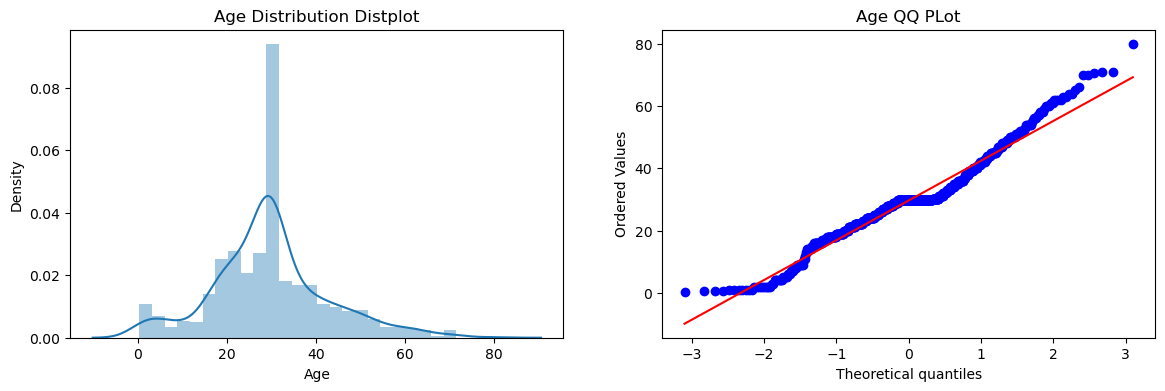

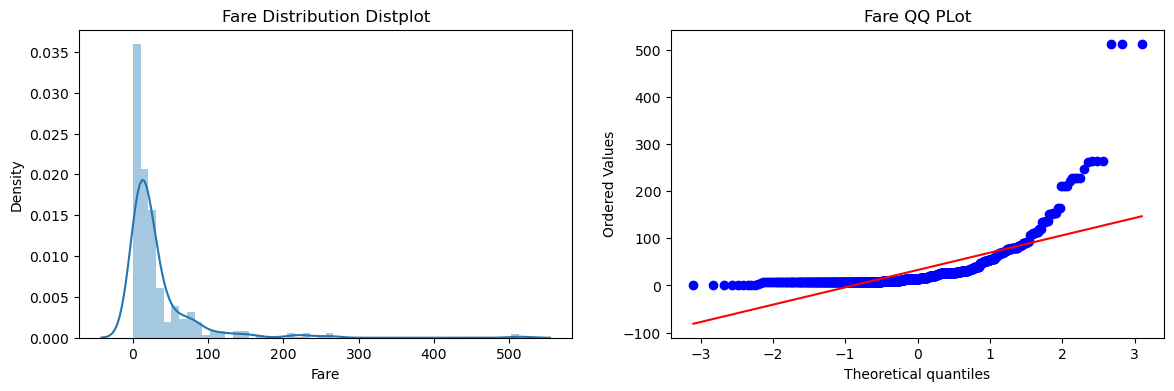

In [8]:
for col in x_train.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col + ' Distribution Distplot')

    plt.subplot(122)
    stats.probplot(x_train[col], dist = "norm", plot = plt)
    plt.title(col + ' QQ PLot')

    plt.show()

#### Applying Algorithm and Checking Accuracy

In [9]:
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()

In [10]:
classifier1.fit(x_train, y_train)
classifier2.fit(x_train, y_train)

y_pred1 = classifier1.predict(x_test)
y_pred2 = classifier2.predict(x_test)

print("Accuracy Logistic Regression -", accuracy_score(y_test, y_pred1))
print("Accuracy Decision Tree -", accuracy_score(y_test, y_pred2))

Accuracy Logistic Regression - 0.7430167597765364
Accuracy Decision Tree - 0.6145251396648045


#### Applying Function Transformer to increase Accuracy

In [11]:
trf = FunctionTransformer(func = np.log1p) #1p adds 1 to each value in the particular column over which transformer is applied

x_train_transformed1 = trf.fit_transform(x_train)
x_test_transformed1 = trf.transform(x_test)

In [12]:
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()

classifier1.fit(x_train_transformed1, y_train)
classifier2.fit(x_train_transformed1, y_train)
    
y_pred1 = classifier1.predict(x_test_transformed1)
y_pred2 = classifier2.predict(x_test_transformed1)
    
print("Accuracy Logistic Regression - ", accuracy_score(y_test, y_pred1))
print("Accuracy Decision Tree", accuracy_score(y_test, y_pred2))

Accuracy Logistic Regression -  0.7877094972067039
Accuracy Decision Tree 0.6145251396648045


In [13]:
# Changing numpy array to dataset with columns of original extrain but values of transformed x_train.
x_train_transformed1 = pd.DataFrame(x_train_transformed1,columns=x_train.columns)
x_train_transformed1

,Age,Fare
57,3.384390,2.107689
717,3.332205,2.442347
431,3.424234,2.839078
633,3.424234,0.000000
163,2.890372,2.268252
...,...,...
369,3.218876,4.252772
320,3.135494,2.110213
527,3.424234,5.406181
125,2.564949,2.504848


#### Comparison after using Function Transformer

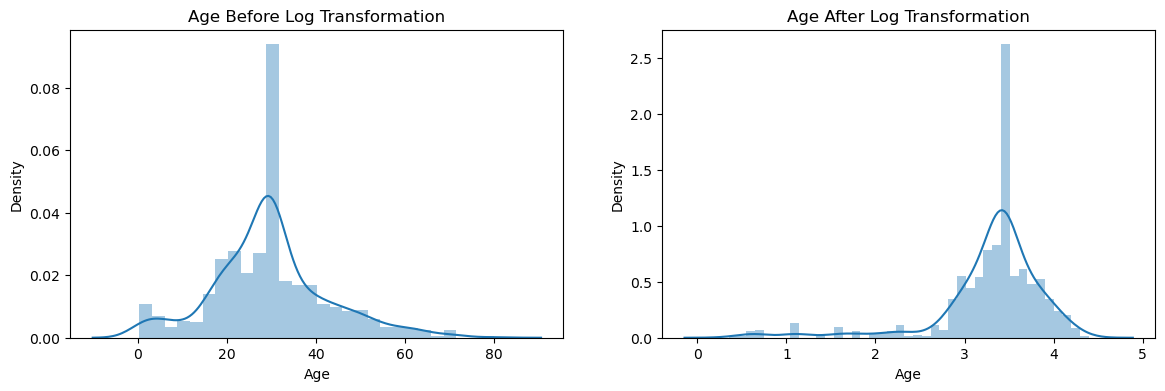

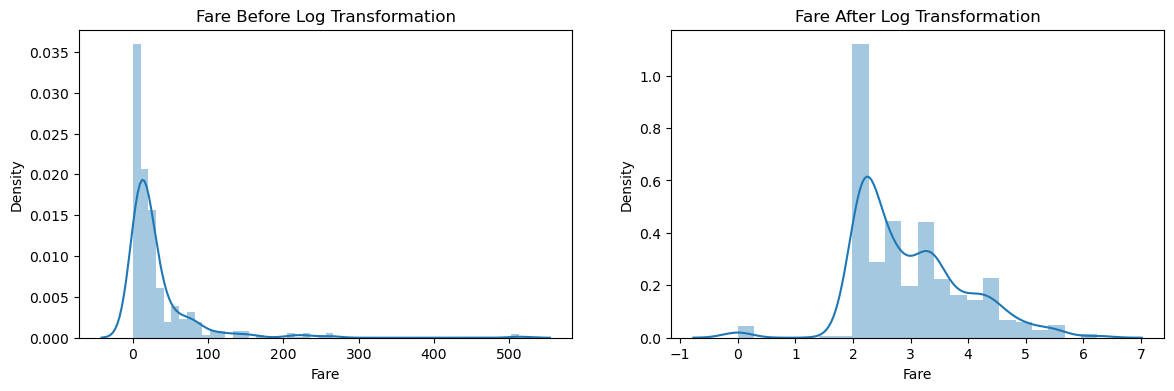

In [14]:
for col in x_train_transformed1.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col + ' Before Log Transformation')

    plt.subplot(122)
    sns.distplot(x_train_transformed1[col])
    plt.title(col + " After Log Transformation")

    plt.show()

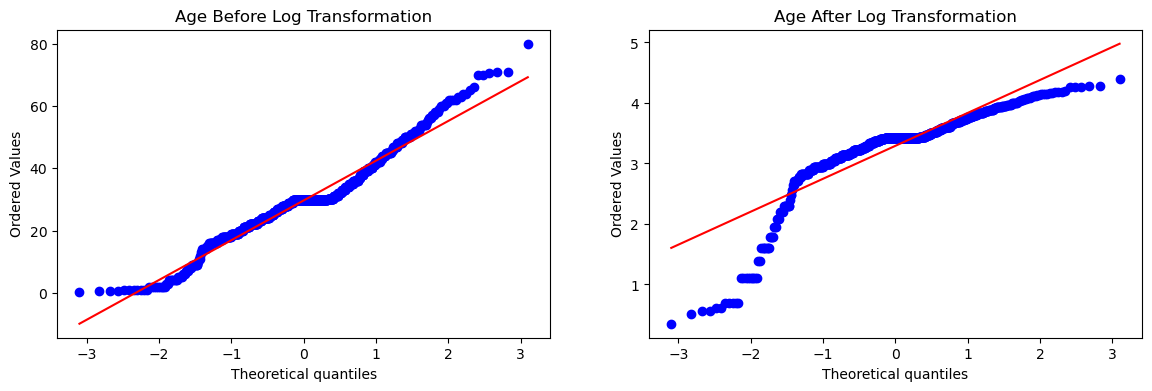

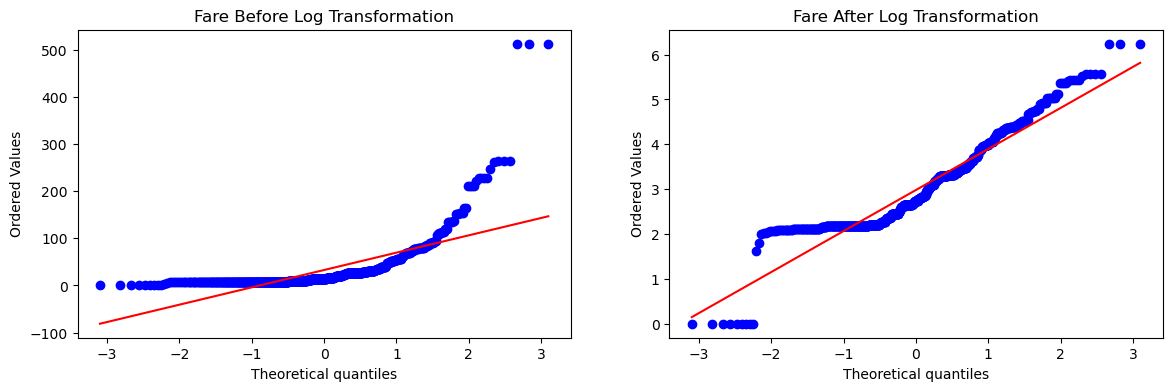

In [15]:
for col in x_train_transformed1.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    stats.probplot(x_train[col], dist = "norm", plot = plt)
    plt.title(col + ' Before Log Transformation')

    plt.subplot(122)
    stats.probplot(x_train_transformed1[col], dist = "norm", plot = plt)
    plt.title(col + " After Log Transformation")

    plt.show()

In [16]:
# We can clearly see that values in Fare column became very close to normal distribution after applying Function Transformer
# But on the other hand for the Age column it didnt go that well because in Age column data was not rightly skewed so Log Transformer will not work for it.
# Therefore we will only apply Log Transformer for Fare column only.

#### Applying Function Transformer on 1 Column using Column Transformer

In [17]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [18]:
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()

classifier1.fit(x_train_transformed2, y_train)
classifier2.fit(x_train_transformed2, y_train)
    
y_pred1 = classifier1.predict(x_test_transformed2)
y_pred2 = classifier2.predict(x_test_transformed2)
    
print("Accuracy Logistic Regression - ", accuracy_score(y_test, y_pred1))
print("Accuracy Decision Tree", accuracy_score(y_test, y_pred2))

Accuracy Logistic Regression -  0.770949720670391
Accuracy Decision Tree 0.6256983240223464
